In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset/subtitles_dataset_tokenized.csv')
crew_df = pd.read_csv('../dataset/crew.tsv', sep='\t')

In [3]:
crew_df.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [4]:
crew_df.shape

(6776644, 3)

In [5]:
df.shape

(46468, 9)

In [6]:
df.head()

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration
0,0,6584498.xml,( Rückblick ) Waren Sie neulich mit uns in die...,1147427,"Comedy,Family,Romance",0,NaN,untokenisiert,NaN
1,1,6977710.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,1294864,"Animation,Comedy",0,NaN,untokenisiert,NaN
2,2,6977706.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,1294865,"Animation,Comedy",0,NaN,untokenisiert,NaN
3,3,6979067.xml,FÜNF FREUNDE - FÜR ALLE FÄLLE FÜNF FREUNDE - F...,1328700,"Animation,Comedy",0,NaN,untokenisiert,NaN
4,4,6979068.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,1328701,"Animation,Comedy",0,NaN,untokenisiert,NaN


In [7]:
# merge datasets
crew_df['IMDB_ID'] = crew_df.tconst.apply(lambda x: int(x.replace('tt', '')))
df = df.merge(right=crew_df, on='IMDB_ID', how='outer')
#df = df.drop(['directors_x', 'writers_x', 'directors_y', 'writers_y'], axis=1)
df = df.drop('tconst', axis=1)
df = df.replace(r'\N', np.nan)

In [8]:
df.head()

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers
0,0.0,6584498.xml,( Rückblick ) Waren Sie neulich mit uns in die...,1147427,"Comedy,Family,Romance",0.0,NaN,untokenisiert,NaN,nm0240047,nm0226201
1,1.0,6977710.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,1294864,"Animation,Comedy",0.0,NaN,untokenisiert,NaN,NaN,"nm0509769,nm0537542,nm0875635"
2,2.0,6977706.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,1294865,"Animation,Comedy",0.0,NaN,untokenisiert,NaN,NaN,"nm0537542,nm0875635"
3,3.0,6979067.xml,FÜNF FREUNDE - FÜR ALLE FÄLLE FÜNF FREUNDE - F...,1328700,"Animation,Comedy",0.0,NaN,untokenisiert,NaN,NaN,"nm0247695,nm0537542,nm0875635"
4,4.0,6979068.xml,FÜNF FREUNDE FÜR ALLE FÄLLE FÜNF FREUNDE FÜR A...,1328701,"Animation,Comedy",0.0,NaN,untokenisiert,NaN,NaN,"nm2243388,nm0537542,nm0875635"


In [9]:
df.shape[0] - df.dropna(subset=['writers', 'directors']).shape[0]

3745418

In [10]:
df.dropna(subset=['genre', 'year', 'production_region', 'duration']).shape

(18277, 11)

In [11]:
df.shape[0] - df.dropna(subset=['text']).shape[0]

6742258

In [12]:
df.dropna(inplace=True)
df.shape

(18102, 11)

In [13]:
df.head()

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers
79,79.0,6581015.xml,HINTER DER LEIWAND Die Anwendung für die Arbei...,6414,"Comedy,Romance,Short",1916.0,English,untokenisiert,30,nm0000122,"nm0117018,nm0000122,nm1176713"
80,80.0,6564964.xml,DER GRAF Maße : Hals 30 cm - Ohr - 4 cm Mounth...,6548,"Comedy,Short",1916.0,English,untokenisiert,24,nm0000122,"nm0117018,nm0000122,nm1176713"
82,82.0,6412883.xml,"Chaplin bei der Feuerwehr "" Lass doch das Haus...",6684,"Comedy,Short",1916.0,English,untokenisiert,24,nm0000122,"nm0000122,nm0117018,nm1176713"
85,85.0,6565009.xml,Der Abenteurer Der Mann Jagd . Ein morgendlich...,7613,"Comedy,Short",1917.0,English,untokenisiert,24,nm0000122,"nm0117018,nm0000122,nm1176713"
86,86.0,6564950.xml,Die Heilquelle Die Gesundheit Frühling La moll...,7832,"Comedy,Short",1917.0,English,untokenisiert,24,nm0000122,"nm0117018,nm0000122,nm1176713"


# Publishing year

In [14]:
df.year.describe()

count    18102.000000
mean      1992.345266
std         20.510059
min       1916.000000
25%       1979.000000
50%       1999.000000
75%       2009.000000
max       2017.000000
Name: year, dtype: float64

In [15]:
year_bins = df.year.max() - df.year.min()
year_bins

101.0

TypeError: object of type 'float' has no len()

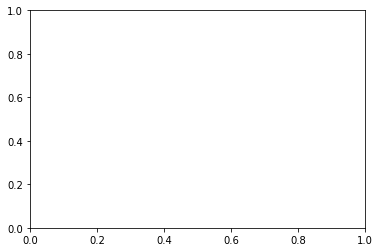

In [16]:
df.year.plot(kind='hist', bins=year_bins)

# Genre

## Unique combinations

In [ ]:
df.genre.unique().shape

In [ ]:
from collections import Counter
genre_combination_frequs = Counter(df.genre)
genre_combination_frequs.most_common(20)

## Single genres

In [ ]:
import re 
single_genres = set([re.sub(r'\s+', '', genre) for entry in df.genre.str.split(',') for genre in entry])
single_genres

In [ ]:
len(single_genres)

# Production Region

## Combinations

In [ ]:
df.production_region.unique()

In [ ]:
df.production_region.unique().shape

In [ ]:
from collections import Counter
region_combination_frequs = Counter(df.production_region)
region_combination_frequs.most_common(20)

## Single regions

In [ ]:
single_region = set([re.sub(r'\s+', '', region) for entry in df.production_region.str.split(',') for region in entry])
single_region

In [ ]:
len(single_region)

# PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df.text)

In [ ]:
pca = PCA(n_components=2)
Xr = pca.fit_transform(X.todense())

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(Xr[:,0], Xr[:,1])
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
grid = sns.pairplot(df, corner=True)